In [6]:
!pip install pyLDAvis
import os
import gensim
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import shutil
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from sklearn.model_selection import KFold
import pyLDAvis
import pyLDAvis.gensim as gensimvis





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.8 MB/s eta 0:00:00a 0:00:01


Reorganising files into more appropriate structure for LDA modelling

In [14]:
def get_orientation_from_folder(folder_name):
    centre_left_newspapers = ['guardian', 'independent', 'mirror']
    centre_right_newspapers = ['telegraph', 'times', 'daily_mail', 'sunday_times']
    
    if any(paper in folder_name.lower() for paper in centre_left_newspapers):
        return 'centre-left'
    elif any(paper in folder_name.lower() for paper in centre_right_newspapers):
        return 'centre-right'
    else:
        return None

def copy_files_to_lda_structure(file_names, article_metadata, prepped_folder_path, lda_model_folder, orientation, newspaper_name):
    time_periods = {
        '1988-1997': (1988, 1997),
        '1998-2007': (1998, 2007),
        '2008-2016': (2008, 2016),
        '2017-2023': (2017, 2023)
    }

    for filename in file_names:
        article_info = article_metadata.get(filename, {})
        year = article_info.get('year')
        target_time_period = None
        for period_label, (start_year, end_year) in time_periods.items():
            if start_year <= year <= end_year:
                target_time_period = period_label
                break

        if target_time_period:
            target_directory = os.path.join(lda_model_folder, orientation, target_time_period, newspaper_name)
            os.makedirs(target_directory, exist_ok=True)
            
            source_path = os.path.join(prepped_folder_path, filename)
            target_path = os.path.join(target_directory, filename)
            shutil.copy(source_path, target_path)
            print(f"Copied {filename} to {target_path}")

def load_filenames(prepped_folder_path):
    return [filename for filename in os.listdir(prepped_folder_path) if filename.endswith('.txt')]

def get_article_metadata(file_names):
    metadata = {}
    for filename in file_names:
        try:
            year = int(filename.split('_')[0].split('-')[0])
            metadata[filename] = {'year': year}
        except (IndexError, ValueError):
            print(f"Could not extract year from filename: {filename}")
    return metadata


parent_folder = r'/Users/mty925/Documents/Dissertation' 
lda_model_folder = os.path.join(parent_folder, 'lda_model_data')  


newspaper_folders = ['guardian', 'independent', 'mirror', 'telegraph', 'times', 'daily_mail', 'sunday_times']

for newspaper in newspaper_folders:
    newspaper_folder = os.path.join(parent_folder, newspaper)
    prepped_folder_path = os.path.join(newspaper_folder, f'{newspaper}_prepped')

    
    orientation = get_orientation_from_folder(newspaper)
    if orientation:
        file_names = load_filenames(prepped_folder_path)
        article_metadata = get_article_metadata(file_names)
        copy_files_to_lda_structure(file_names, article_metadata, prepped_folder_path, lda_model_folder, orientation, newspaper)
    else:
        print(f"Could not determine orientation for folder: {newspaper_folder}")


Copied 2016-05-30_The pragmatic progressive what sets Obama apart from Bernie Sanders.txt to /Users/mty925/Documents/Dissertation/lda_model_data/centre-left/2008-2016/guardian/2016-05-30_The pragmatic progressive what sets Obama apart from Bernie Sanders.txt
Copied 2012-10-02_Letters Dismay at plans to build schools with no future.txt to /Users/mty925/Documents/Dissertation/lda_model_data/centre-left/2008-2016/guardian/2012-10-02_Letters Dismay at plans to build schools with no future.txt
Copied 2009-11-26_China sets first targets to curb worlds largest carbon footprint.txt to /Users/mty925/Documents/Dissertation/lda_model_data/centre-left/2008-2016/guardian/2009-11-26_China sets first targets to curb worlds largest carbon footprint.txt
Copied 2008-03-04_Cut your carbon footprint not those of poor farmers.txt to /Users/mty925/Documents/Dissertation/lda_model_data/centre-left/2008-2016/guardian/2008-03-04_Cut your carbon footprint not those of poor farmers.txt
Copied 2001-06-17_Malcolm 

Model selection for Centre Left group scorss 3 time periods 

Evaluating LDA Model for Time Period: 1988-1997
Num Topics: 2, Coherence: 0.5921, Perplexity: -8.4343, Cross-Validation Coherence: 0.5139
Num Topics: 3, Coherence: 0.5904, Perplexity: -8.4208, Cross-Validation Coherence: 0.5612
Num Topics: 4, Coherence: 0.6117, Perplexity: -8.4318, Cross-Validation Coherence: 0.5642
Num Topics: 5, Coherence: 0.5383, Perplexity: -8.4688, Cross-Validation Coherence: 0.5289
Num Topics: 6, Coherence: 0.5011, Perplexity: -8.4580, Cross-Validation Coherence: 0.4832
Num Topics: 7, Coherence: 0.4383, Perplexity: -8.4565, Cross-Validation Coherence: 0.4695
Num Topics: 8, Coherence: 0.4821, Perplexity: -8.4630, Cross-Validation Coherence: 0.4940
Num Topics: 9, Coherence: 0.4702, Perplexity: -8.4597, Cross-Validation Coherence: 0.4804
Num Topics: 10, Coherence: 0.4555, Perplexity: -8.4478, Cross-Validation Coherence: 0.4474
Num Topics: 11, Coherence: 0.4457, Perplexity: -8.4525, Cross-Validation Coherence: 0.4516
Num Topics: 12, Coherence: 0.4330, Perplexity: -8.

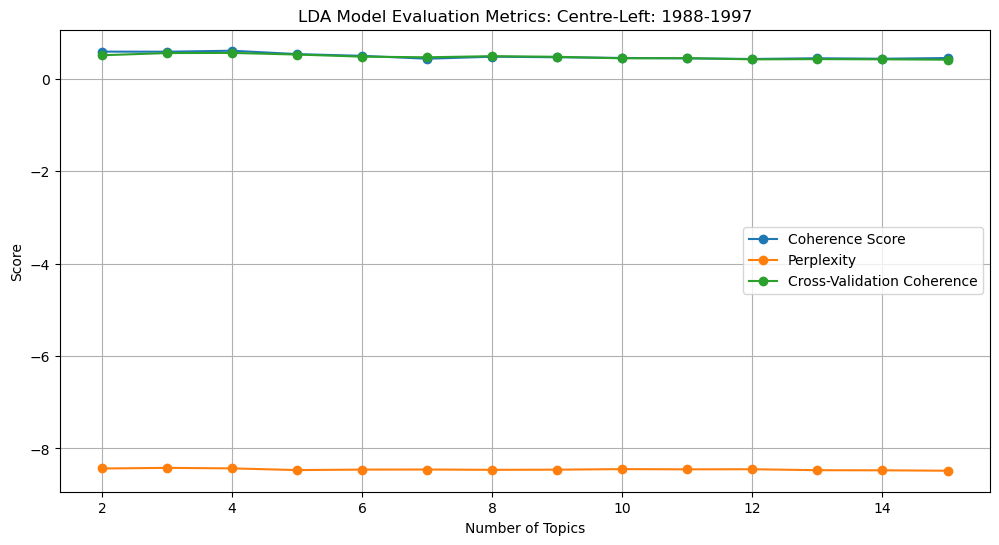

Evaluating LDA Model for Time Period: 1998-2007
Num Topics: 2, Coherence: 0.3986, Perplexity: -8.3430, Cross-Validation Coherence: 0.4029
Num Topics: 3, Coherence: 0.4497, Perplexity: -8.2543, Cross-Validation Coherence: 0.4211
Num Topics: 4, Coherence: 0.4368, Perplexity: -8.2382, Cross-Validation Coherence: 0.4070
Num Topics: 5, Coherence: 0.4297, Perplexity: -8.2450, Cross-Validation Coherence: 0.4150
Num Topics: 6, Coherence: 0.4849, Perplexity: -8.2614, Cross-Validation Coherence: 0.4408
Num Topics: 7, Coherence: 0.5104, Perplexity: -8.3061, Cross-Validation Coherence: 0.4835
Num Topics: 8, Coherence: 0.5188, Perplexity: -8.3833, Cross-Validation Coherence: 0.5061
Num Topics: 9, Coherence: 0.5175, Perplexity: -8.4619, Cross-Validation Coherence: 0.5161
Num Topics: 10, Coherence: 0.5072, Perplexity: -8.5297, Cross-Validation Coherence: 0.5232
Num Topics: 11, Coherence: 0.5420, Perplexity: -8.5941, Cross-Validation Coherence: 0.5074
Num Topics: 12, Coherence: 0.5346, Perplexity: -8.

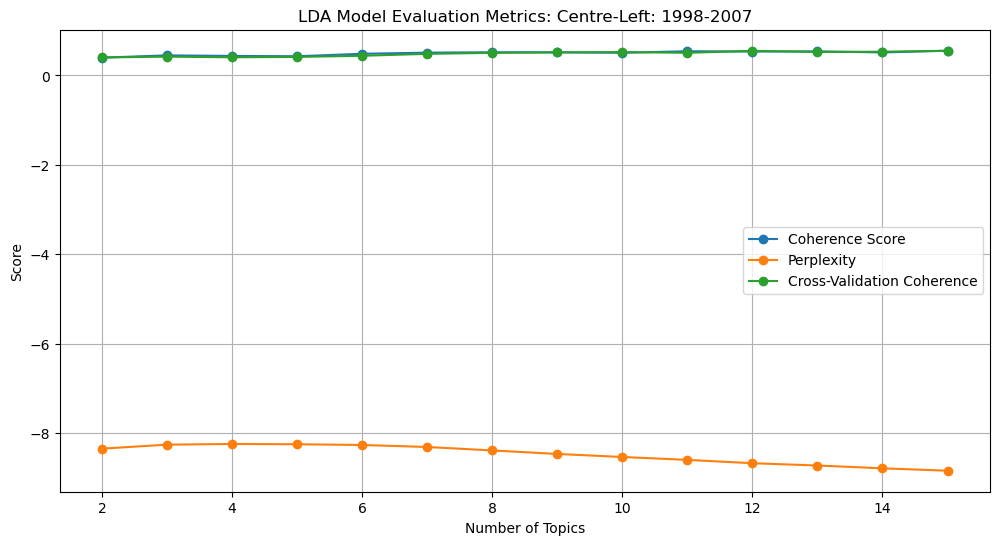

Evaluating LDA Model for Time Period: 2008-2016
Num Topics: 2, Coherence: 0.3253, Perplexity: -8.1307, Cross-Validation Coherence: 0.3156
Num Topics: 3, Coherence: 0.4279, Perplexity: -8.0518, Cross-Validation Coherence: 0.3887
Num Topics: 4, Coherence: 0.4597, Perplexity: -8.0164, Cross-Validation Coherence: 0.4643
Num Topics: 5, Coherence: 0.4608, Perplexity: -8.0063, Cross-Validation Coherence: 0.4573
Num Topics: 6, Coherence: 0.4799, Perplexity: -8.0400, Cross-Validation Coherence: 0.4692
Num Topics: 7, Coherence: 0.4717, Perplexity: -8.0596, Cross-Validation Coherence: 0.4626
Num Topics: 8, Coherence: 0.4955, Perplexity: -8.1346, Cross-Validation Coherence: 0.4774
Num Topics: 9, Coherence: 0.5005, Perplexity: -8.2252, Cross-Validation Coherence: 0.4836
Num Topics: 10, Coherence: 0.4828, Perplexity: -8.3252, Cross-Validation Coherence: 0.4897
Num Topics: 11, Coherence: 0.4823, Perplexity: -8.4265, Cross-Validation Coherence: 0.4946
Num Topics: 12, Coherence: 0.4965, Perplexity: -8.

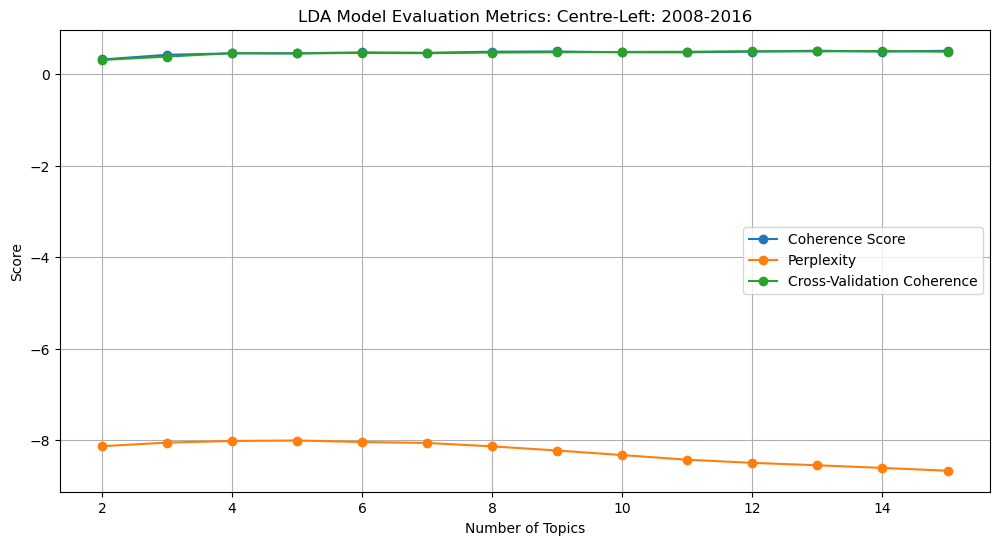

In [15]:

def load_articles_from_folder(folder_path):
    articles = []
    for newspaper_folder in os.listdir(folder_path):
        newspaper_path = os.path.join(folder_path, newspaper_folder)
        if os.path.isdir(newspaper_path):
            for filename in os.listdir(newspaper_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(newspaper_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        tokens = content.split()  
                        articles.append(tokens)
    return articles

def prepare_corpus(articles):
    dictionary = corpora.Dictionary(articles)
    corpus = [dictionary.doc2bow(article) for article in articles]
    
    return dictionary, corpus

def compute_coherence_score(lda_model, corpus, dictionary, articles):
    coherence_model = CoherenceModel(model=lda_model, texts=articles, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

def perform_cross_validation(articles, num_topics, dictionary, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    coherence_scores = []
    for train_index, test_index in kf.split(articles):
        train_articles = [articles[i] for i in train_index]
        train_corpus = [dictionary.doc2bow(article) for article in train_articles]
        lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        coherence = compute_coherence_score(lda_model, train_corpus, dictionary, train_articles)
        coherence_scores.append(coherence)
    
    return np.mean(coherence_scores)

def evaluate_lda_models(dictionary, corpus, articles, min_topics=2, max_topics=15):
    topics_range = range(min_topics, max_topics + 1)
    coherence_scores = []
    perplexities = []
    cross_val_scores = []

    for num_topics in topics_range:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        
        # Coherence score
        coherence = compute_coherence_score(lda_model, corpus, dictionary, articles)
        coherence_scores.append(coherence)
        
        # Perplexity
        perplexity = lda_model.log_perplexity(corpus)
        perplexities.append(perplexity)
        
        # Cross-validation
        cross_val_score = perform_cross_validation(articles, num_topics, dictionary)
        cross_val_scores.append(cross_val_score)

        print(f"Num Topics: {num_topics}, Coherence: {coherence:.4f}, Perplexity: {perplexity:.4f}, Cross-Validation Coherence: {cross_val_score:.4f}")

    return topics_range, coherence_scores, perplexities, cross_val_scores

def plot_model_metrics(topics_range, coherence_scores, perplexities, cross_val_scores, title):
    plt.figure(figsize=(12, 6))

    plt.plot(topics_range, coherence_scores, marker='o', label='Coherence Score')
    plt.plot(topics_range, perplexities, marker='o', label='Perplexity')
    plt.plot(topics_range, cross_val_scores, marker='o', label='Cross-Validation Coherence')

    plt.xlabel('Number of Topics')
    plt.ylabel('Score')
    plt.title(f'LDA Model Evaluation Metrics: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_data/centre-left' 


time_periods = {
    '1988-1997': os.path.join(parent_folder, '1988-1997'),
    '1998-2007': os.path.join(parent_folder, '1998-2007'),
    '2008-2016': os.path.join(parent_folder, '2008-2016')
}

for period_label, folder_path in time_periods.items():
    print(f"Evaluating LDA Model for Time Period: {period_label}")
    
    articles = load_articles_from_folder(folder_path)
    
    if not articles:
        print(f"No articles found for Time Period: {period_label}")
        continue
    
    dictionary, corpus = prepare_corpus(articles)

    topics_range, coherence_scores, perplexities, cross_val_scores = evaluate_lda_models(dictionary, corpus, articles, min_topics=2, max_topics=15)

    plot_model_metrics(topics_range, coherence_scores, perplexities, cross_val_scores, title=f"Centre-Left: {period_label}")


Further iterations with increased number of topics for time period 1998-2007 and 2008-2016 minimun 16 maximum 30 due to steadily increasing coherence metrics. Also altered the plotting for two seperate graphs for perplexity and coherence/cross validation coherence to improve scaling.

Evaluating LDA Model for Time Period: 1998-2007
Num Topics: 16, Coherence: 0.5455, Perplexity: -8.8886, Cross-Validation Coherence: 0.5501
Num Topics: 17, Coherence: 0.5376, Perplexity: -8.9447, Cross-Validation Coherence: 0.5372
Num Topics: 18, Coherence: 0.5239, Perplexity: -9.0020, Cross-Validation Coherence: 0.5511
Num Topics: 19, Coherence: 0.5416, Perplexity: -9.0435, Cross-Validation Coherence: 0.5474
Num Topics: 20, Coherence: 0.5061, Perplexity: -9.1093, Cross-Validation Coherence: 0.5526
Num Topics: 21, Coherence: 0.5173, Perplexity: -9.1633, Cross-Validation Coherence: 0.5458
Num Topics: 22, Coherence: 0.5384, Perplexity: -9.2117, Cross-Validation Coherence: 0.5420
Num Topics: 23, Coherence: 0.5317, Perplexity: -9.2632, Cross-Validation Coherence: 0.5435
Num Topics: 24, Coherence: 0.5416, Perplexity: -9.3157, Cross-Validation Coherence: 0.5435
Num Topics: 25, Coherence: 0.5086, Perplexity: -9.3748, Cross-Validation Coherence: 0.5433


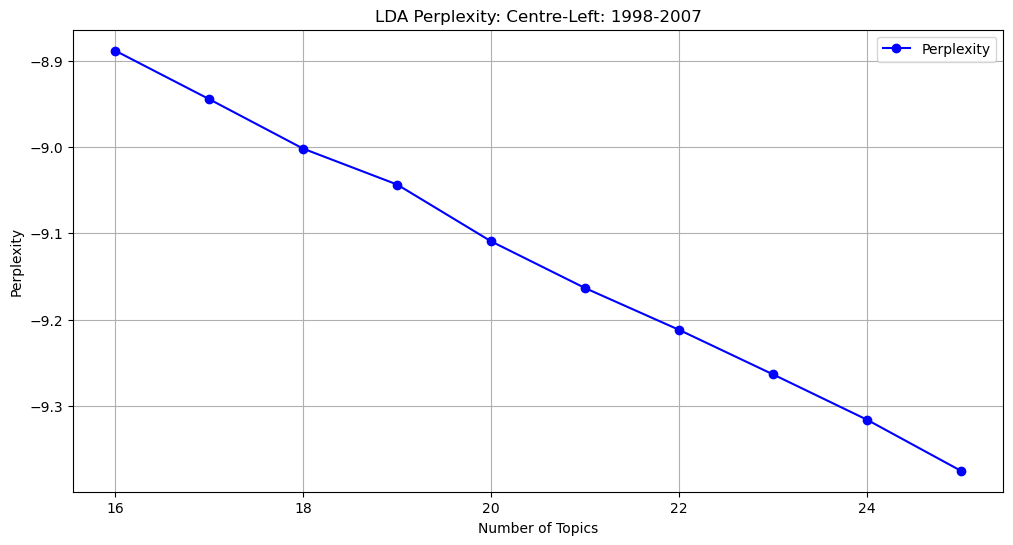

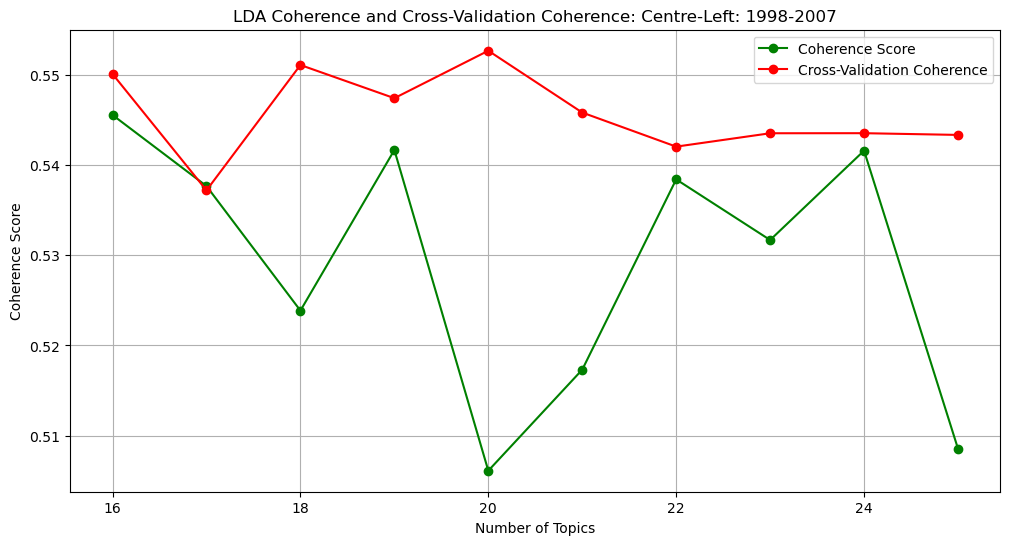

Evaluating LDA Model for Time Period: 2008-2016
Num Topics: 16, Coherence: 0.5280, Perplexity: -8.7236, Cross-Validation Coherence: 0.5063
Num Topics: 17, Coherence: 0.5207, Perplexity: -8.7701, Cross-Validation Coherence: 0.5079
Num Topics: 18, Coherence: 0.5148, Perplexity: -8.8285, Cross-Validation Coherence: 0.5049
Num Topics: 19, Coherence: 0.5143, Perplexity: -8.8820, Cross-Validation Coherence: 0.5090
Num Topics: 20, Coherence: 0.5131, Perplexity: -8.9338, Cross-Validation Coherence: 0.5239
Num Topics: 21, Coherence: 0.5443, Perplexity: -8.9843, Cross-Validation Coherence: 0.5202
Num Topics: 22, Coherence: 0.5336, Perplexity: -9.0353, Cross-Validation Coherence: 0.5211
Num Topics: 23, Coherence: 0.5461, Perplexity: -9.0887, Cross-Validation Coherence: 0.5289
Num Topics: 24, Coherence: 0.5330, Perplexity: -9.1407, Cross-Validation Coherence: 0.5138
Num Topics: 25, Coherence: 0.5309, Perplexity: -9.1960, Cross-Validation Coherence: 0.5261


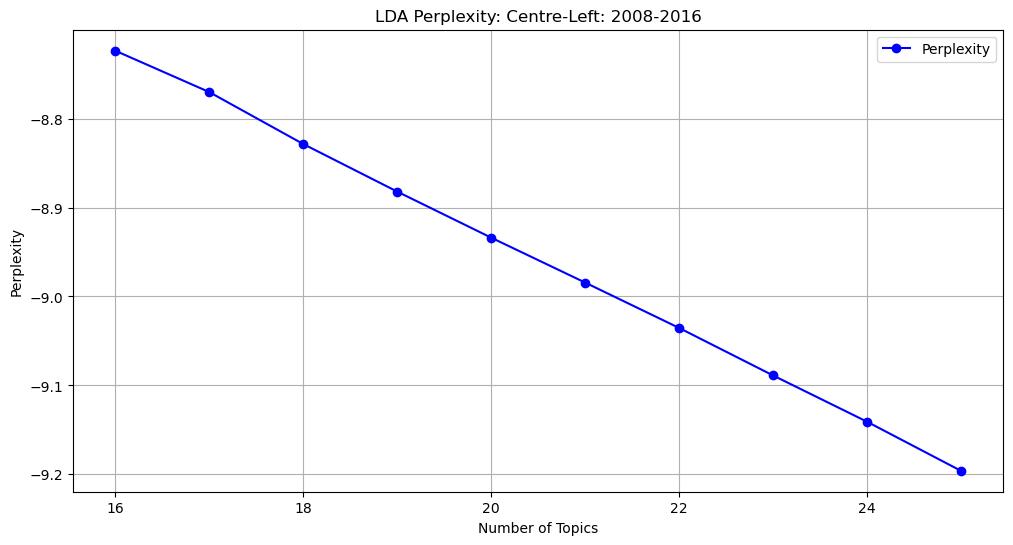

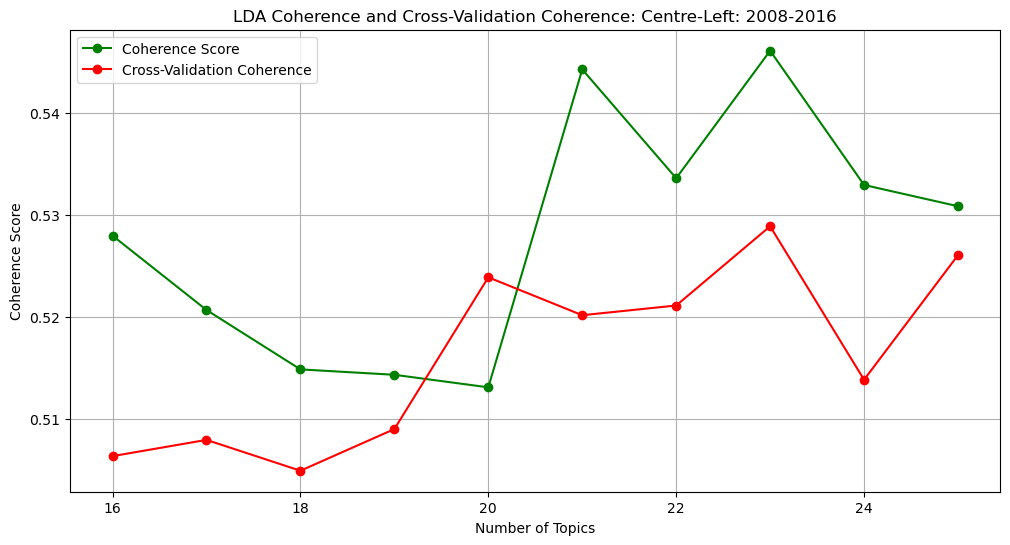

In [3]:
def load_articles_from_folder(folder_path):
    articles = []
    for newspaper_folder in os.listdir(folder_path):
        newspaper_path = os.path.join(folder_path, newspaper_folder)
        if os.path.isdir(newspaper_path):
            for filename in os.listdir(newspaper_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(newspaper_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        tokens = content.split() 
                        articles.append(tokens)
    return articles

def prepare_corpus(articles):
    dictionary = corpora.Dictionary(articles)
    corpus = [dictionary.doc2bow(article) for article in articles]
    
    return dictionary, corpus

def compute_coherence_score(lda_model, corpus, dictionary, articles):
    coherence_model = CoherenceModel(model=lda_model, texts=articles, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

def perform_cross_validation(articles, num_topics, dictionary, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    coherence_scores = []
    for train_index, test_index in kf.split(articles):
        train_articles = [articles[i] for i in train_index]
        train_corpus = [dictionary.doc2bow(article) for article in train_articles]
        lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        coherence = compute_coherence_score(lda_model, train_corpus, dictionary, train_articles)
        coherence_scores.append(coherence)
    
    return np.mean(coherence_scores)

def evaluate_lda_models(dictionary, corpus, articles, min_topics=16, max_topics=25):
    topics_range = range(min_topics, max_topics + 1)
    coherence_scores = []
    perplexities = []
    cross_val_scores = []

    for num_topics in topics_range:
        # Train the LDA model
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        
        # Coherence
        coherence = compute_coherence_score(lda_model, corpus, dictionary, articles)
        coherence_scores.append(coherence)
        
        # Perplexity
        perplexity = lda_model.log_perplexity(corpus)
        perplexities.append(perplexity)
        
        # Cross-validation
        cross_val_score = perform_cross_validation(articles, num_topics, dictionary)
        cross_val_scores.append(cross_val_score)

        print(f"Num Topics: {num_topics}, Coherence: {coherence:.4f}, Perplexity: {perplexity:.4f}, Cross-Validation Coherence: {cross_val_score:.4f}")

    return topics_range, coherence_scores, perplexities, cross_val_scores

def plot_perplexity(topics_range, perplexities, title):
    plt.figure(figsize=(12, 6))
    plt.plot(topics_range, perplexities, marker='o', color='blue', label='Perplexity')
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.title(f'LDA Perplexity: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_coherence_scores(topics_range, coherence_scores, cross_val_scores, title):
    plt.figure(figsize=(12, 6))
    plt.plot(topics_range, coherence_scores, marker='o', color='green', label='Coherence Score')
    plt.plot(topics_range, cross_val_scores, marker='o', color='red', label='Cross-Validation Coherence')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title(f'LDA Coherence and Cross-Validation Coherence: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_data/centre-left' 


time_periods = {
    '1998-2007': os.path.join(parent_folder, '1998-2007'),
    '2008-2016': os.path.join(parent_folder, '2008-2016')
}


for period_label, folder_path in time_periods.items():
    print(f"Evaluating LDA Model for Time Period: {period_label}")
    
    articles = load_articles_from_folder(folder_path)
    
    if not articles:
        print(f"No articles found for Time Period: {period_label}")
        continue
    
    dictionary, corpus = prepare_corpus(articles)

 
    topics_range, coherence_scores, perplexities, cross_val_scores = evaluate_lda_models(dictionary, corpus, articles, min_topics=16, max_topics=25)
    
    plot_perplexity(topics_range, perplexities, title=f"Centre-Left: {period_label}")
    plot_coherence_scores(topics_range, coherence_scores, cross_val_scores, title=f"Centre-Left: {period_label}")

Model selection for centre right across 3 time periods 
- Plotted choerence & cross validation coherence on two seperate graphs 
- increased range of potential k values from 2-25 to reflect findings from centre left group

Evaluating LDA Model for Time Period: 1988-1997
Num Topics: 2, Coherence: 0.2627, Perplexity: -8.6674, Cross-Validation Coherence: 0.3340
Num Topics: 3, Coherence: 0.4389, Perplexity: -8.5570, Cross-Validation Coherence: 0.4149
Num Topics: 4, Coherence: 0.4641, Perplexity: -8.5681, Cross-Validation Coherence: 0.3827
Num Topics: 5, Coherence: 0.4805, Perplexity: -8.5686, Cross-Validation Coherence: 0.3953
Num Topics: 6, Coherence: 0.5038, Perplexity: -8.5845, Cross-Validation Coherence: 0.3566
Num Topics: 7, Coherence: 0.5227, Perplexity: -8.6041, Cross-Validation Coherence: 0.3854
Num Topics: 8, Coherence: 0.5418, Perplexity: -8.6638, Cross-Validation Coherence: 0.3998
Num Topics: 9, Coherence: 0.5322, Perplexity: -8.7293, Cross-Validation Coherence: 0.3981
Num Topics: 10, Coherence: 0.5318, Perplexity: -8.8033, Cross-Validation Coherence: 0.4167
Num Topics: 11, Coherence: 0.5342, Perplexity: -8.8947, Cross-Validation Coherence: 0.4036
Num Topics: 12, Coherence: 0.4582, Perplexity: -8.

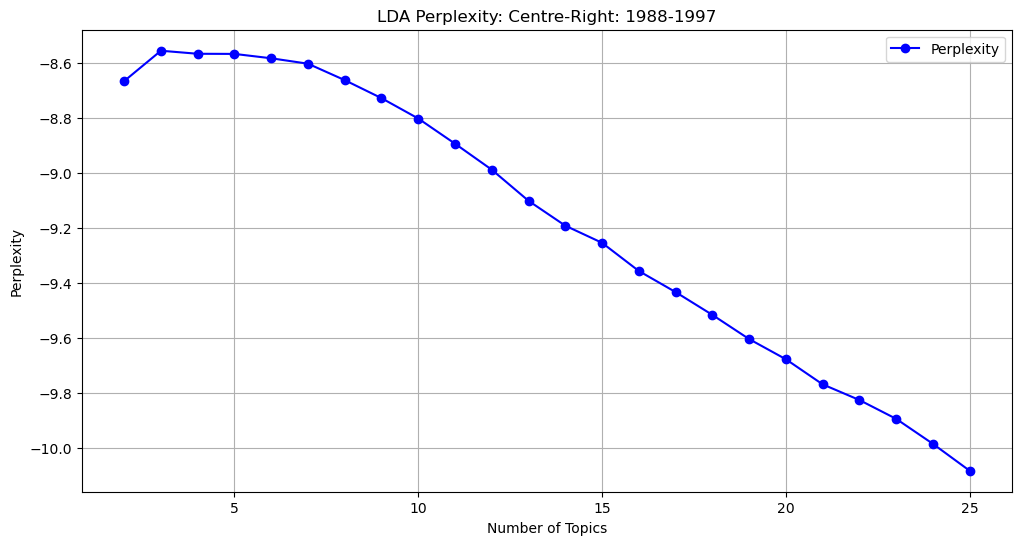

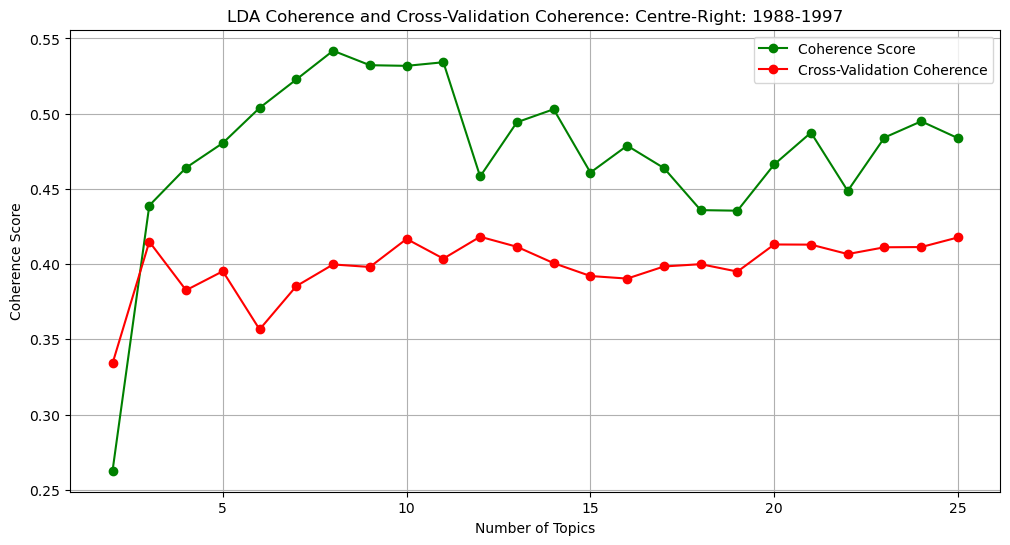

Evaluating LDA Model for Time Period: 1998-2007
Num Topics: 2, Coherence: 0.5062, Perplexity: -8.6757, Cross-Validation Coherence: 0.5050
Num Topics: 3, Coherence: 0.4333, Perplexity: -8.6541, Cross-Validation Coherence: 0.4759
Num Topics: 4, Coherence: 0.5253, Perplexity: -8.5768, Cross-Validation Coherence: 0.5276
Num Topics: 5, Coherence: 0.5197, Perplexity: -8.5661, Cross-Validation Coherence: 0.5292
Num Topics: 6, Coherence: 0.5267, Perplexity: -8.6346, Cross-Validation Coherence: 0.5475
Num Topics: 7, Coherence: 0.5748, Perplexity: -8.7190, Cross-Validation Coherence: 0.5151
Num Topics: 8, Coherence: 0.5393, Perplexity: -8.8044, Cross-Validation Coherence: 0.5447
Num Topics: 9, Coherence: 0.5410, Perplexity: -8.8823, Cross-Validation Coherence: 0.5351
Num Topics: 10, Coherence: 0.5241, Perplexity: -8.9953, Cross-Validation Coherence: 0.5432
Num Topics: 11, Coherence: 0.5482, Perplexity: -9.0739, Cross-Validation Coherence: 0.5573
Num Topics: 12, Coherence: 0.5502, Perplexity: -9.

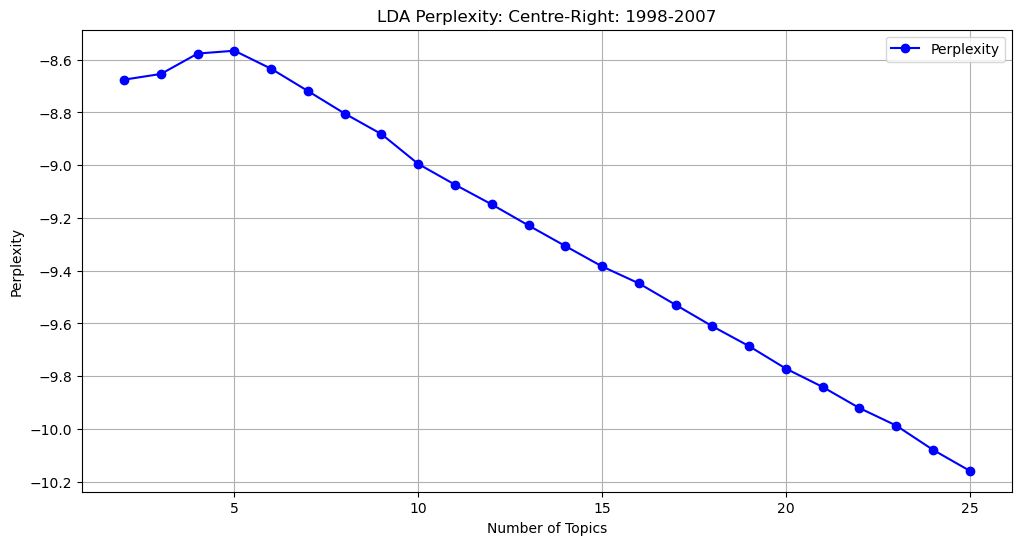

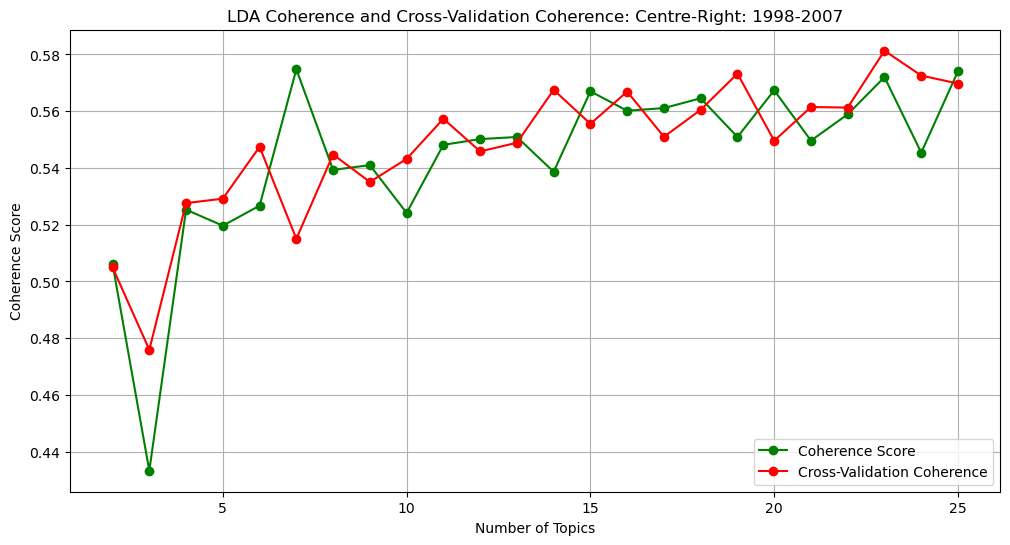

Evaluating LDA Model for Time Period: 2008-2016
Num Topics: 2, Coherence: 0.4193, Perplexity: -8.5307, Cross-Validation Coherence: 0.4177
Num Topics: 3, Coherence: 0.4575, Perplexity: -8.4641, Cross-Validation Coherence: 0.4642
Num Topics: 4, Coherence: 0.5232, Perplexity: -8.4193, Cross-Validation Coherence: 0.5053
Num Topics: 5, Coherence: 0.5448, Perplexity: -8.4151, Cross-Validation Coherence: 0.5458
Num Topics: 6, Coherence: 0.5586, Perplexity: -8.4679, Cross-Validation Coherence: 0.5561
Num Topics: 7, Coherence: 0.5620, Perplexity: -8.4968, Cross-Validation Coherence: 0.5702
Num Topics: 8, Coherence: 0.5707, Perplexity: -8.5721, Cross-Validation Coherence: 0.5712
Num Topics: 9, Coherence: 0.5640, Perplexity: -8.6437, Cross-Validation Coherence: 0.5634
Num Topics: 10, Coherence: 0.5661, Perplexity: -8.7137, Cross-Validation Coherence: 0.5533
Num Topics: 11, Coherence: 0.5708, Perplexity: -8.7832, Cross-Validation Coherence: 0.5639
Num Topics: 12, Coherence: 0.5890, Perplexity: -8.

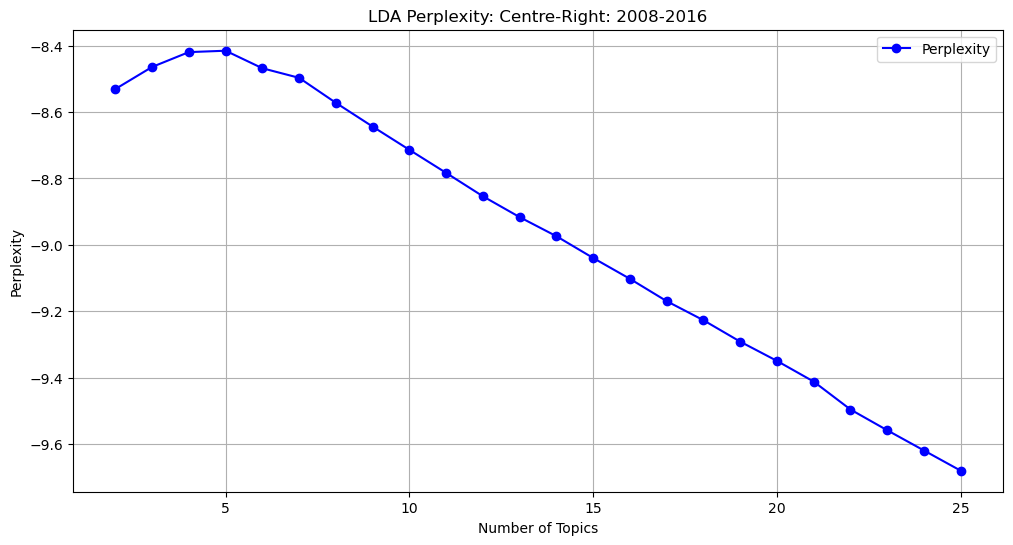

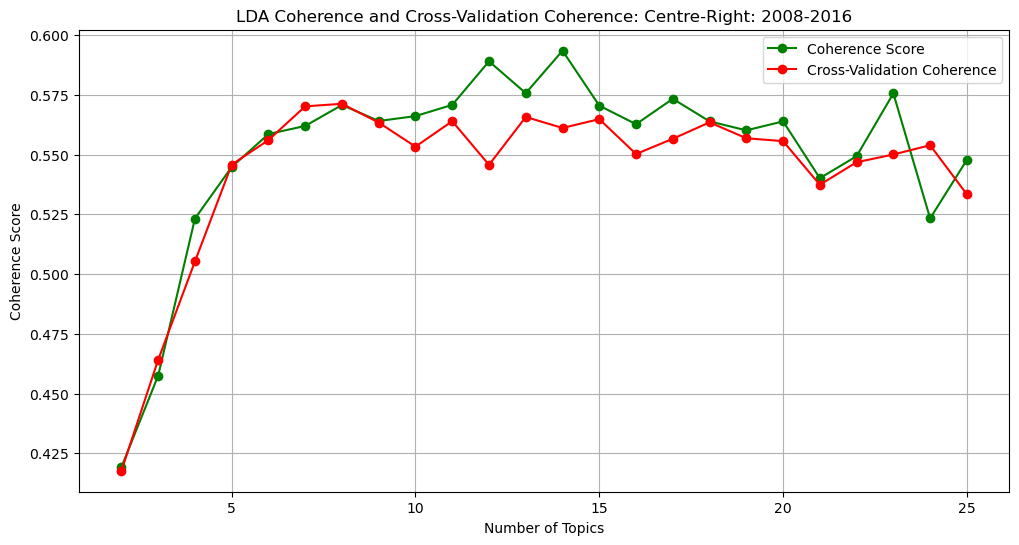

In [4]:
def load_articles_from_folder(folder_path):
    articles = []
    for newspaper_folder in os.listdir(folder_path):
        newspaper_path = os.path.join(folder_path, newspaper_folder)
        if os.path.isdir(newspaper_path):
            for filename in os.listdir(newspaper_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(newspaper_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        tokens = content.split() 
                        articles.append(tokens)
    return articles

def prepare_corpus(articles):
    dictionary = corpora.Dictionary(articles)
    corpus = [dictionary.doc2bow(article) for article in articles]
    
    return dictionary, corpus

def compute_coherence_score(lda_model, corpus, dictionary, articles):
    coherence_model = CoherenceModel(model=lda_model, texts=articles, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

def perform_cross_validation(articles, num_topics, dictionary, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    coherence_scores = []
    for train_index, test_index in kf.split(articles):
        train_articles = [articles[i] for i in train_index]
        train_corpus = [dictionary.doc2bow(article) for article in train_articles]
        lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        coherence = compute_coherence_score(lda_model, train_corpus, dictionary, train_articles)
        coherence_scores.append(coherence)
    
    return np.mean(coherence_scores)

def evaluate_lda_models(dictionary, corpus, articles, min_topics=2, max_topics=25):
    topics_range = range(min_topics, max_topics + 1)
    coherence_scores = []
    perplexities = []
    cross_val_scores = []

    for num_topics in topics_range:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        
        # Coherence score
        coherence = compute_coherence_score(lda_model, corpus, dictionary, articles)
        coherence_scores.append(coherence)
        
        # Perplexity
        perplexity = lda_model.log_perplexity(corpus)
        perplexities.append(perplexity)
        
        # Cross-validation
        cross_val_score = perform_cross_validation(articles, num_topics, dictionary)
        cross_val_scores.append(cross_val_score)

        print(f"Num Topics: {num_topics}, Coherence: {coherence:.4f}, Perplexity: {perplexity:.4f}, Cross-Validation Coherence: {cross_val_score:.4f}")

    return topics_range, coherence_scores, perplexities, cross_val_scores

def plot_perplexity(topics_range, perplexities, title):
    plt.figure(figsize=(12, 6))
    plt.plot(topics_range, perplexities, marker='o', color='blue', label='Perplexity')
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.title(f'LDA Perplexity: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_coherence_scores(topics_range, coherence_scores, cross_val_scores, title):
    plt.figure(figsize=(12, 6))
    plt.plot(topics_range, coherence_scores, marker='o', color='green', label='Coherence Score')
    plt.plot(topics_range, cross_val_scores, marker='o', color='red', label='Cross-Validation Coherence')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title(f'LDA Coherence and Cross-Validation Coherence: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()


parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_data/centre-right'  


time_periods = {
    '1988-1997': os.path.join(parent_folder, '1988-1997'),
    '1998-2007': os.path.join(parent_folder, '1998-2007'),
    '2008-2016': os.path.join(parent_folder, '2008-2016')
}


for period_label, folder_path in time_periods.items():
    print(f"Evaluating LDA Model for Time Period: {period_label}")
    
   
    articles = load_articles_from_folder(folder_path)
    
    if not articles:
        print(f"No articles found for Time Period: {period_label}")
        continue
    
  
    dictionary, corpus = prepare_corpus(articles)

  
    topics_range, coherence_scores, perplexities, cross_val_scores = evaluate_lda_models(dictionary, corpus, articles, min_topics=2, max_topics=25)

    plot_perplexity(topics_range, perplexities, title=f"Centre-Right: {period_label}")
    plot_coherence_scores(topics_range, coherence_scores, cross_val_scores, title=f"Centre-Right: {period_label}")


Final models 

Final model for centre left 

In [3]:

parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_data/centre-left'  
output_parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left'  

time_periods = {
    '1988-1997': {'topics': 4, 'path': os.path.join(parent_folder, '1988-1997')},
    '1998-2007': {'topics': 15, 'path': os.path.join(parent_folder, '1998-2007')},
    '2008-2016': {'topics': 23, 'path': os.path.join(parent_folder, '2008-2016')}
}

def load_articles_from_folder(folder_path):
    articles = []
    filenames = []
    for newspaper_folder in os.listdir(folder_path):
        newspaper_path = os.path.join(folder_path, newspaper_folder)
        if os.path.isdir(newspaper_path):
            for filename in os.listdir(newspaper_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(newspaper_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        articles.append(file.read().split())  
                        filenames.append(file_path)  
    return articles, filenames

def save_top_words(lda_model, num_topics, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for idx, topic in lda_model.print_topics(num_topics):
            f.write(f"Topic {idx}: {topic}\n")
    print(f"Top words per topic saved to {output_file}")

def save_topic_document_distribution(lda_model, corpus, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for i, row in enumerate(lda_model[corpus]):
            f.write(f"Document {i}: {row}\n")
    print(f"Topic-document distributions saved to {output_file}")

def get_most_representative_documents(lda_model, corpus, filenames, top_n=3):
    topic_docs = {}

    for topic_id in range(lda_model.num_topics):
        topic_distribution = [
            (doc_index, proportion)
            for doc_index, doc_topics in enumerate(lda_model[corpus])
            for topic, proportion in doc_topics
            if topic == topic_id
        ]
        
        sorted_docs = sorted(topic_distribution, key=lambda x: x[1], reverse=True)
        topic_docs[topic_id] = [filenames[doc_index] for doc_index, _ in sorted_docs[:top_n]]
    
    return topic_docs

def save_representative_filenames(topic_docs, output_folder, period):
    for topic_id, docs in topic_docs.items():
        topic_folder = os.path.join(output_folder, period, f"Topic_{topic_id}")
        if not os.path.exists(topic_folder):
            os.makedirs(topic_folder)
        
        filenames_output_path = os.path.join(topic_folder, f"representative_filenames_topic_{topic_id}.txt")
        with open(filenames_output_path, 'w', encoding='utf-8') as file:
            for doc_path in docs:
                file.write(f"{doc_path}\n")
        print(f"Saved filenames for representative documents for Topic {topic_id} in {filenames_output_path}")

def train_lda_model(articles, filenames, num_topics, period, output_folder):
    
    dictionary = corpora.Dictionary(articles)
    corpus = [dictionary.doc2bow(article) for article in articles]

   
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

   
    top_words_file = os.path.join(output_folder, f"top_words_{period}_{num_topics}_topics.txt")
    topic_document_dist_file = os.path.join(output_folder, f"topic_document_distribution_{period}_{num_topics}_topics.txt")
    model_path = os.path.join(output_folder, f'final_lda_model_{period}_{num_topics}_topics.model')
    dictionary_path = os.path.join(output_folder, f'lda_dictionary_{period}_{num_topics}.dict')
    corpus_path = os.path.join(output_folder, f'lda_corpus_{period}_{num_topics}.mm')
    visualization_file = os.path.join(output_folder, f'pyLDAvis_{period}_{num_topics}_topics.html')

   
    save_top_words(lda_model, num_topics, top_words_file)

   
    save_topic_document_distribution(lda_model, corpus, topic_document_dist_file)

    #Coherence
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"\nCoherence Score for {period}: {coherence_lda}")

    #Visualise
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, visualization_file) 
    print(f"pyLDAvis visualization saved to {visualization_file}")

    lda_model.save(model_path)
    dictionary.save(dictionary_path)
    corpora.MmCorpus.serialize(corpus_path, corpus)
    print(f"Model, dictionary, and corpus saved for {period} with K={num_topics}.")

    topic_docs = get_most_representative_documents(lda_model, corpus, filenames, top_n=3)
    save_representative_filenames(topic_docs, output_folder, period)

    return lda_model, dictionary, corpus, coherence_lda


for period, details in time_periods.items():
    print(f"\nTraining LDA model for {period} with K={details['topics']}")
    articles, filenames = load_articles_from_folder(details['path'])

    if articles:
        
        output_folder = os.path.join(output_parent_folder, period)
        lda_model, dictionary, corpus, coherence_lda = train_lda_model(articles, filenames, details['topics'], period, output_folder)
    else:
        print(f"No articles found for {period}. Skipping...")



Training LDA model for 1988-1997 with K=4
Top words per topic saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/top_words_1988-1997_4_topics.txt
Topic-document distributions saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/topic_document_distribution_1988-1997_4_topics.txt

Coherence Score for 1988-1997: 0.611726071788296


/opt/anaconda3/envs/dissertation/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59642) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/dissertation/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59642) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/dissertation/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59642) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/dissertation/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59642) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/dissertation/lib

pyLDAvis visualization saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/pyLDAvis_1988-1997_4_topics.html
Model, dictionary, and corpus saved for 1988-1997 with K=4.
Saved filenames for representative documents for Topic 0 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/1988-1997/Topic_0/representative_filenames_topic_0.txt
Saved filenames for representative documents for Topic 1 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/1988-1997/Topic_1/representative_filenames_topic_1.txt
Saved filenames for representative documents for Topic 2 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/1988-1997/Topic_2/representative_filenames_topic_2.txt
Saved filenames for representative documents for Topic 3 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-left/1988-1997/1988-1997/Topic_3/representative_filenames_topic_3.txt

Training LDA model for 1998-2

Final model for centre right 

In [4]:
parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_data/centre-right'  
output_parent_folder = r'/Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right'  

time_periods = {
    '1988-1997': {'topics': 8, 'path': os.path.join(parent_folder, '1988-1997')},
    '1998-2007': {'topics': 15, 'path': os.path.join(parent_folder, '1998-2007')},
    '2008-2016': {'topics': 15, 'path': os.path.join(parent_folder, '2008-2016')}
}

def load_articles_from_folder(folder_path):
    articles = []
    filenames = []
   
    for newspaper_folder in os.listdir(folder_path):
        newspaper_path = os.path.join(folder_path, newspaper_folder)
        if os.path.isdir(newspaper_path):
            for filename in os.listdir(newspaper_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(newspaper_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        articles.append(file.read().split())  
                        filenames.append(file_path) 
    return articles, filenames

def save_top_words(lda_model, num_topics, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for idx, topic in lda_model.print_topics(num_topics):
            f.write(f"Topic {idx}: {topic}\n")
    print(f"Top words per topic saved to {output_file}")

def save_topic_document_distribution(lda_model, corpus, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for i, row in enumerate(lda_model[corpus]):
            f.write(f"Document {i}: {row}\n")
    print(f"Topic-document distributions saved to {output_file}")

def get_most_representative_documents(lda_model, corpus, filenames, top_n=3):
    topic_docs = {}

    for topic_id in range(lda_model.num_topics):
        topic_distribution = [
            (doc_index, proportion)
            for doc_index, doc_topics in enumerate(lda_model[corpus])
            for topic, proportion in doc_topics
            if topic == topic_id
        ]
        sorted_docs = sorted(topic_distribution, key=lambda x: x[1], reverse=True)
        topic_docs[topic_id] = [filenames[doc_index] for doc_index, _ in sorted_docs[:top_n]]
    
    return topic_docs

def save_representative_filenames(topic_docs, output_folder, period):
    for topic_id, docs in topic_docs.items():
        topic_folder = os.path.join(output_folder, period, f"Topic_{topic_id}")
        if not os.path.exists(topic_folder):
            os.makedirs(topic_folder)
        
        filenames_output_path = os.path.join(topic_folder, f"representative_filenames_topic_{topic_id}.txt")
        with open(filenames_output_path, 'w', encoding='utf-8') as file:
            for doc_path in docs:
                file.write(f"{doc_path}\n")
        print(f"Saved filenames for representative documents for Topic {topic_id} in {filenames_output_path}")

def train_lda_model(articles, filenames, num_topics, period, output_folder):
    dictionary = corpora.Dictionary(articles)
    corpus = [dictionary.doc2bow(article) for article in articles]
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

   
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)


    top_words_file = os.path.join(output_folder, f"top_words_{period}_{num_topics}_topics.txt")
    topic_document_dist_file = os.path.join(output_folder, f"topic_document_distribution_{period}_{num_topics}_topics.txt")
    model_path = os.path.join(output_folder, f'final_lda_model_{period}_{num_topics}_topics.model')
    dictionary_path = os.path.join(output_folder, f'lda_dictionary_{period}_{num_topics}.dict')
    corpus_path = os.path.join(output_folder, f'lda_corpus_{period}_{num_topics}.mm')
    visualization_file = os.path.join(output_folder, f'pyLDAvis_{period}_{num_topics}_topics.html')
    save_top_words(lda_model, num_topics, top_words_file)

    save_topic_document_distribution(lda_model, corpus, topic_document_dist_file)

    # Coherence
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"\nCoherence Score for {period}: {coherence_lda}")

    # Visualiz
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, visualization_file)  # Save the visualization as an HTML file
    print(f"pyLDAvis visualization saved to {visualization_file}")

    lda_model.save(model_path)
    dictionary.save(dictionary_path)
    corpora.MmCorpus.serialize(corpus_path, corpus)
    print(f"Model, dictionary, and corpus saved for {period} with K={num_topics}.")

    topic_docs = get_most_representative_documents(lda_model, corpus, filenames, top_n=3)
    save_representative_filenames(topic_docs, output_folder, period)

    return lda_model, dictionary, corpus, coherence_lda

for period, details in time_periods.items():
    print(f"\nTraining LDA model for {period} with K={details['topics']}")
    articles, filenames = load_articles_from_folder(details['path'])

    if articles:
        output_folder = os.path.join(output_parent_folder, period)
        lda_model, dictionary, corpus, coherence_lda = train_lda_model(articles, filenames, details['topics'], period, output_folder)
    else:
        print(f"No articles found for {period}. Skipping...")



Training LDA model for 1988-1997 with K=8
Top words per topic saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right/1988-1997/top_words_1988-1997_8_topics.txt
Topic-document distributions saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right/1988-1997/topic_document_distribution_1988-1997_8_topics.txt

Coherence Score for 1988-1997: 0.5418094344970394
pyLDAvis visualization saved to /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right/1988-1997/pyLDAvis_1988-1997_8_topics.html
Model, dictionary, and corpus saved for 1988-1997 with K=8.
Saved filenames for representative documents for Topic 0 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right/1988-1997/1988-1997/Topic_0/representative_filenames_topic_0.txt
Saved filenames for representative documents for Topic 1 in /Users/mty925/Documents/Dissertation/lda_model_outputs/centre-right/1988-1997/1988-1997/Topic_1/representative_filenames_topic_1.txt
Saved file

Topic diversity 

In [1]:
def calculate_topic_diversity(file_path, top_n=10):
    top_words = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            topic_words = line.split("+")[0:top_n]
            words = [word.split("*")[1].strip().replace('"', '') for word in topic_words]
            top_words.extend(words)

    unique_words = set(top_words)
    num_unique_words = len(unique_words)
    total_words = top_n * (len(top_words) // top_n)
    topic_diversity = num_unique_words / total_words

    return topic_diversity

base_dir = '/Users/mty925/Documents/Dissertation/lda_model_outputs'

configurations = {
    'centre-left': {
        '1988-1997': 4,
        '1998-2007': 15,
        '2008-2016': 23
    },
    'centre-right': {
        '1988-1997': 8,
        '1998-2007': 15,
        '2008-2016': 15
    }
}


for orientation, periods in configurations.items():
    for period, num_topics in periods.items():
       
        file_path = os.path.join(base_dir, orientation, period, f'top_words_{period}_{num_topics}_topics.txt')
        if os.path.exists(file_path):
            topic_diversity_score = calculate_topic_diversity(file_path, top_n=10)
            print(f"Topic Diversity Score for {orientation} during {period} with {num_topics} topics: {topic_diversity_score:.4f}")
        else:
            print(f"File not found: {file_path}")


Topic Diversity Score for centre-left during 1988-1997 with 4 topics: 0.8250
Topic Diversity Score for centre-left during 1998-2007 with 15 topics: 0.7933
Topic Diversity Score for centre-left during 2008-2016 with 23 topics: 0.7435
Topic Diversity Score for centre-right during 1988-1997 with 8 topics: 0.6625
Topic Diversity Score for centre-right during 1998-2007 with 15 topics: 0.8267
Topic Diversity Score for centre-right during 2008-2016 with 15 topics: 0.8200
